In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/2020/tips.csv

--2022-08-17 00:53:49--  http://sk.jaen.kr:8080/2020/tips.csv
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, awaiting response... 200 OK
Length: 7775 (7.6K) [text/csv]
Saving to: ‘tips.csv’

tips.csv            100%[===================>]   7.59K  --.-KB/s    in 0s      

2022-08-17 00:53:50 (461 MB/s) - ‘tips.csv’ saved [7775/7775]



In [4]:
#해당 파일을 읽어 df를 생성하세요
tip_df = pd.read_csv('tips.csv', encoding='utf-8')
tip_df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


In [5]:
#tipdf의 차원을 조회하세요
print('차원:', tip_df.ndim)

차원: 2


In [ ]:
#tipdf의 크기를 조회하세요(행, 열)
print('행&열:', tip_df.shape)



행&열: (245, 7)


In [ ]:
#맨 마지막 데이터 3개을 조회하세요
tip_df.tail(3)


,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df의 정보를 조회하세요
tip_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


In [ ]:
#가장 팁이 높은 데이터 3개의 정보를 구하세요
tip_sort_df = tip_df.sort_values(by="tip", ascending=False)
tip_sort_df.head(3)

# this also works
tip_df.sort_values(by='tip', ascending=False).head(3)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0
212,48.33,9.00,Male,No,Sat,Dinner,4.0
23,39.42,7.58,Male,No,Sat,Dinner,4.0


In [ ]:
#tips_pct를 구해서 tip_df에 새로운 컬럼명으로 추가하세요 (소수 둘째자리까지 반영)
#공식 : tip / total_bill * 100의 결과를 소수 둘째자리로 변경하여 반영
tip_df['tips_pct'] = round(tip_df['tip']/tip_df['total_bill'] * 100, 2)
tip_df

## OR
tip_df['tips_pct'] = (tip_df['tip']/tip_df['total_bill'] * 100).round(2)
tip_df



,total_bill,tip,sex,smoker,day,time,size,tips_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2.0,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.68
...,...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2.0,9.82
243,18.78,3.00,Female,No,Thur,Dinner,2.0,15.97


In [ ]:
#성별, 팁비율별로 정렬하여 팁 비율이 높은 정보 3개 출력

tip_df_new = tip_df.sort_values(by=['sex', 'tips_pct'], ascending=False).head(3)


In [ ]:
## 빈도수 조회
tip_df['day'].value_counts()

# unique values only
tip_df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri', nan], dtype=object)

In [ ]:
#male 정보만 검색해서 tipdf_male에 저장후 크기 출력
tipdf_male = tip_df[tip_df["sex"].isin(["Male"])]
# OR
tipdf_male = tip_df[tip_df['sex'] == 'Male']
tipdf_male
print("크기:", tipdf_male.shape)


크기: (157, 8)


In [ ]:
# use df.loc to filter : df.loc[행 조건, 열 조건]
# tip_df.loc[tip_df['sex'] == 'Male', :] 
# Same as
# tip_df.loc[tip_df['sex']=='Male', 'tips_pct'].mean() #gives the mean value of tips_pct
tip_df.loc[tip_df['sex']=='Male', 'tips_pct'].agg(['min','max'])

min     3.56
max    71.03
Name: tips_pct, dtype: float64

In [ ]:
#Female 정보만 검색해서 tipdf_female에 저장후 크기 출력
tipdf_female = tip_df[tip_df["sex"].isin(["Female"])]
# OR
tipdf_female = tip_df[tip_df['sex'] == 'Female']
tipdf_female
print("크기:", tipdf_female.shape)

크기: (87, 8)


In [ ]:
#여러 개 조건 비교
tip_pct_range=tip_df[(tip_df.tips_pct>10) & (tip_df.tips_pct<20)]
tip_pct_range

# Or
tip_df_range_new=tip_df[(tip_df.sex=='Male') | (tip_df.sex=='Female')]

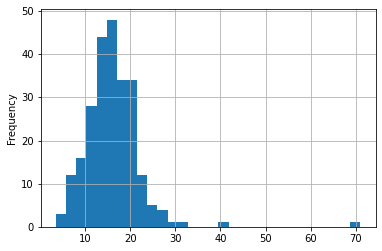

In [ ]:
import matplotlib.pyplot as plt
#data visualization
tip_df['tips_pct'].plot(kind='hist', bins=30, grid=True)
plt.show()

In [ ]:
# Describe Function
tip_df.describe().round(1)

,total_bill,tip,size,tips_pct
count,245.0,244.0,244.0,244.0
mean,19.8,3.0,2.6,16.1
std,8.9,1.4,1.0,6.1
min,3.1,1.0,1.0,3.6
25%,13.4,2.0,2.0,12.9
50%,17.8,2.9,2.0,15.5
75%,24.3,3.6,3.0,19.1
max,50.8,10.0,6.0,71.0


In [ ]:
tip_df['tips_pct'].quantile([0.1,0.2])

0.1     9.856
0.2    12.130
Name: tips_pct, dtype: float64

In [ ]:
#각 row별 na값 갯수 count
# for i in range(len(tip_df)) :
  #  print("Na in row ", i , " : " ,  tip_df.iloc[i].isnull().sum())
tip_df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
240    0
241    0
242    0
243    0
244    7
Length: 245, dtype: int64

In [ ]:
#na값 포함된 row 삭제
  
tip_df.dropna()


,total_bill,tip,sex,smoker,day,time,size,tips_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2.0,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.68
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3.0,20.39
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2.0,9.82


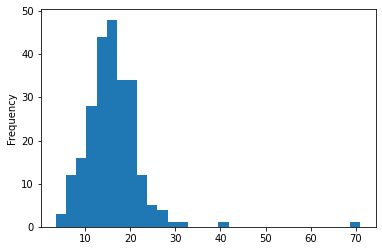

In [ ]:
tip_df.dropna(inplace=True)
tip_df['tips_pct'].plot(kind='hist', bins=30)
plt.show()